# Language variables
Model including speech, BERT entropy, BERT surprisal and frequency

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%matplotlib inline
from tools.create import create_set_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from tools.viz import plot_contrast_by_analysis

In [5]:
api = Neuroscout()

## Create and compile

In [6]:
predictors = ["speech", "BERTLM_pre_25_surprisal", "BERTLM_pre_25_entropy", "subtlexusfrequency_Lg10WF", "text_length"]

In [5]:
transformations = [{"Name": "Scale", 
                    "Demean": True, 
                    "Rescale": True,
                    "ReplaceNA": "after", 
                    "Input": ["BERTLM_pre_25_surprisal", 
                              "BERTLM_pre_25_entropy", 
                              "subtlexusfrequency_Lg10WF", 
                              "text_length"]}]

In [6]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 
             'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

In [7]:
mdict = create_set_models(predictors, confounds, name='+'.join(predictors), transformations=transformations)

Dataset: SchematicNarrative, Predictors: ['speech', 'BERTLM_pre_25_surprisal', 'BERTLM_pre_25_entropy', 'subtlexusfrequency_Lg10WF', 'text_length'] Not all named predictors could be found for the specified runs.
Dataset: studyforrest, Predictors: ['speech', 'BERTLM_pre_25_surprisal', 'BERTLM_pre_25_entropy', 'subtlexusfrequency_Lg10WF', 'text_length'] Not all named predictors could be found for the specified runs.


In [15]:
set_models = {}
set_models['+'.join(predictors)] = mdict

In [7]:
filename = Path('models') / 'language_variables.json'

In [16]:
#dump_collection(set_models, filename)

In [8]:
set_models = load_collection(filename)

### Reports

In [10]:
""" Run reports for all models """
for (pred, dataset, task), model in flatten_collection(set_models):
    model.generate_report(run_id=model.runs[0])

In [11]:
# Plot example design matrix
set_models['+'.join(predictors)]['LearningTemporalStructure']['movie'].plot_report()

'OK'

### Compile

In [27]:
for (dataset, task), model in flatten_collection(set_models['+'.join(predictors)]):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{model.status}')
        print(f'{dataset}')

PASSED
HealthyBrainNetwork
PASSED
LearningTemporalStructure
PASSED
Life
PASSED
ParanoiaStory
PASSED
Raiders
PASSED
Sherlock
PASSED
SherlockMerlin
PASSED
SherlockMerlin


In [23]:
print(' '.join([model.hash_id for (dataset, task), model in flatten_collection(set_models['+'.join(predictors)])]))

97pae AZ4L1 M4jEG A25nL wkVr4 MNQVN M55G6 9eyB6


## Results

In [12]:
flat_models = flatten_collection(set_models)

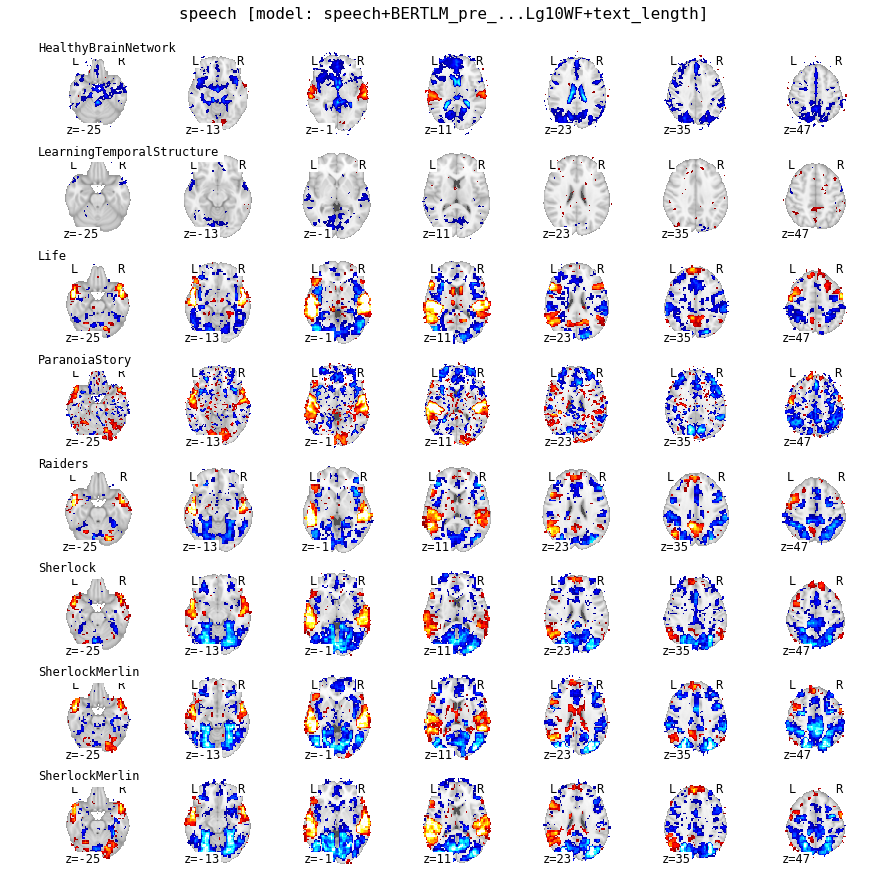

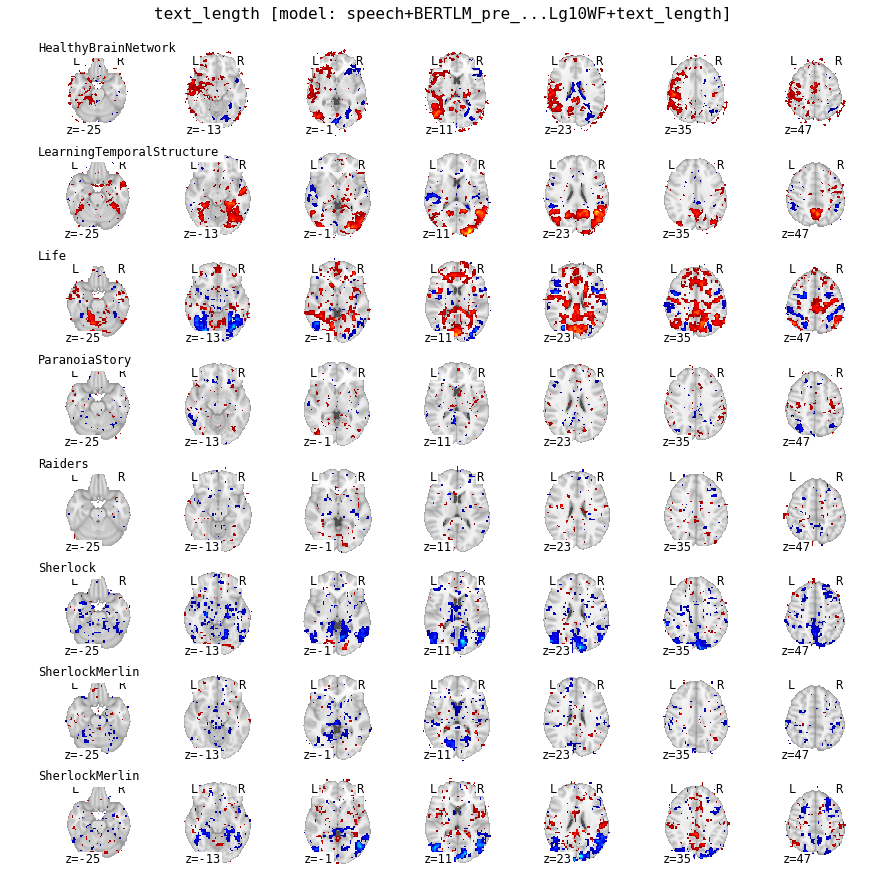

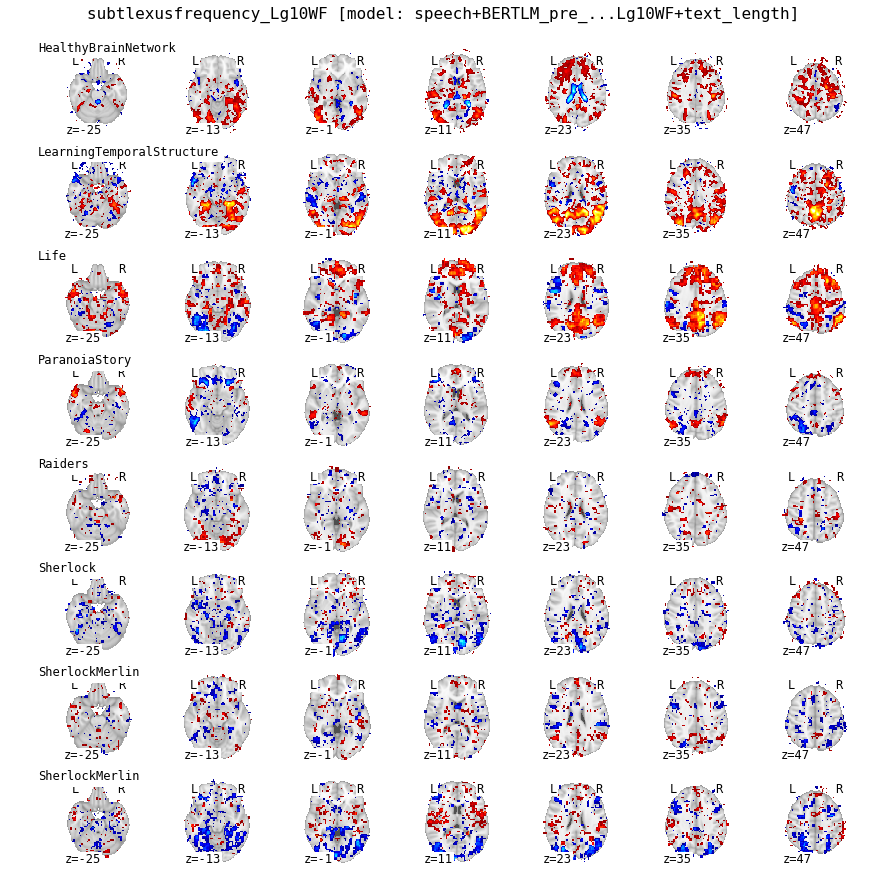

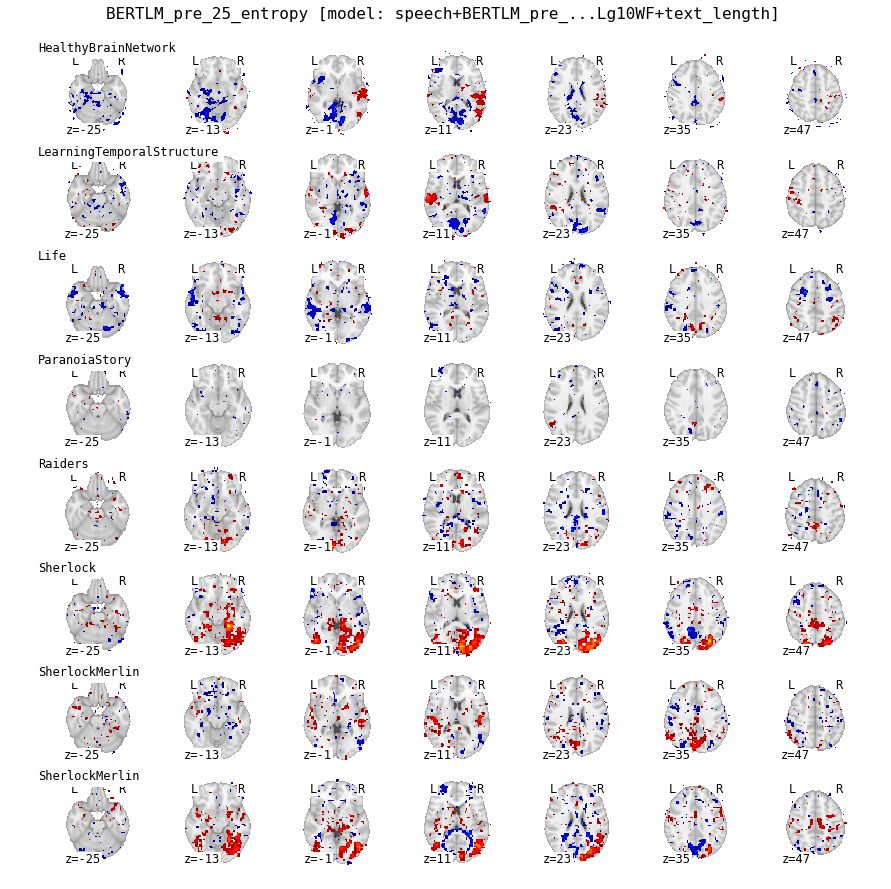

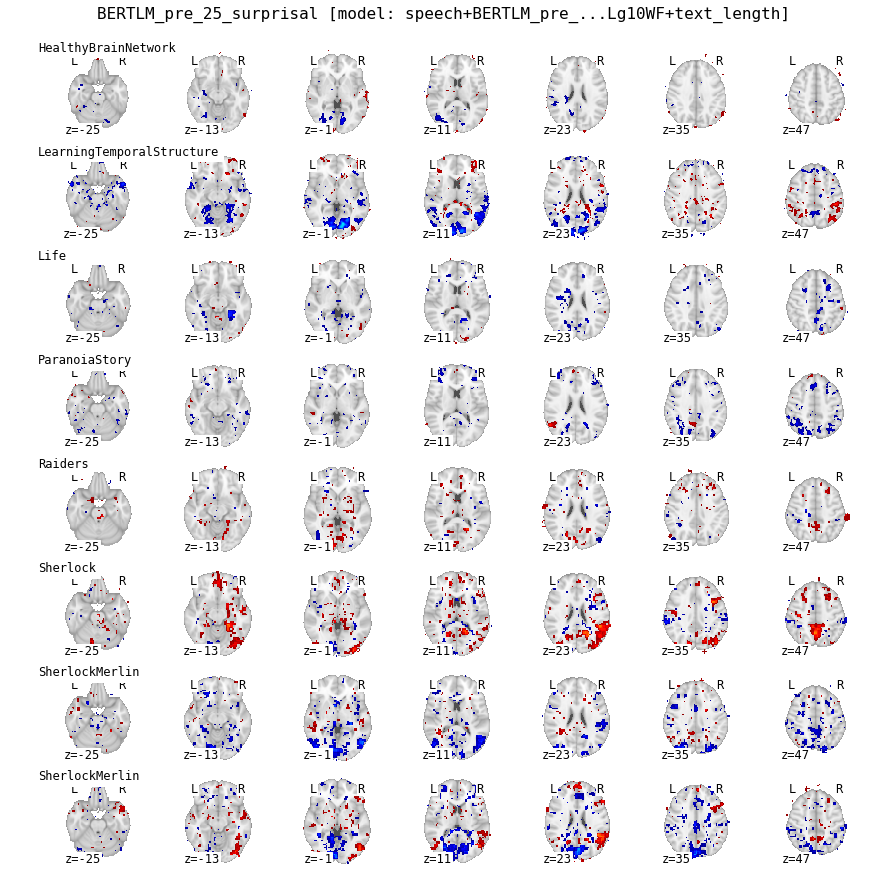

In [13]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(analyses=flat_models,
                          models=['+'.join(predictors)],
                          vmax=10, display_mode='z', 
                          figsize=(15,15),
                          threshold=1.96, colorbar=False)

## Entropy and surprisal control model
Are effects in previous model wiped out because of shared variance between entropy and surprisal?

In [15]:
transformations_control = [{"Name": "Scale", 
                            "Demean": True, 
                            "Rescale": True,
                            "ReplaceNA": "after", 
                            "Input": predictors[1:3]}]

In [18]:
mdict_control = create_set_models(predictors[1:3], confounds, name='+'.join(predictors[1:3]), 
                                  transformations=transformations_control)
set_models['+'.join(predictors[1:3])] = mdict_control

In [20]:
#dump_collection(set_models, filename)

Plot reports

In [22]:
for (dataset, task), model in flatten_collection(set_models['+'.join(predictors[1:3])]):
    model.generate_report(run_id=model.runs[0])

In [23]:
# Plot example design matrix
set_models['+'.join(predictors[1:3])]['LearningTemporalStructure']['movie'].plot_report()

'OK'

In [30]:
for (dataset, task), model in flatten_collection(set_models['+'.join(predictors[1:3])]):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{model.status}')
        print(f'{dataset}')

PASSED
HealthyBrainNetwork
PASSED
LearningTemporalStructure
PASSED
Life
PASSED
ParanoiaStory
PASSED
Raiders
PASSED
Sherlock
PASSED
SherlockMerlin
PASSED
SherlockMerlin


In [32]:
print(' '.join([model.hash_id for (dataset, task), model in flatten_collection(set_models['+'.join(predictors[1:3])])]))

Mnkoj 9L2dp 9Edx0 MGv0l wWybr AqQOb Ma4x4 wjNoP


In [14]:
flat_models_control = [f for f in flatten_collection(set_models) if f[0][0] == '+'.join(predictors[1:3])]

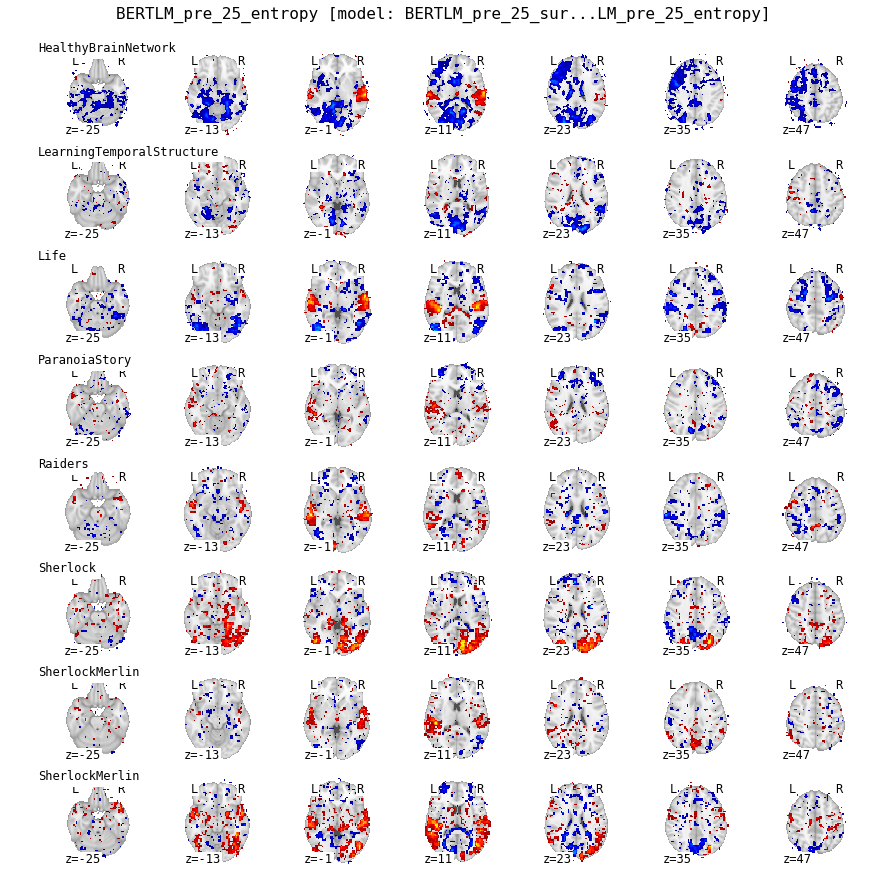

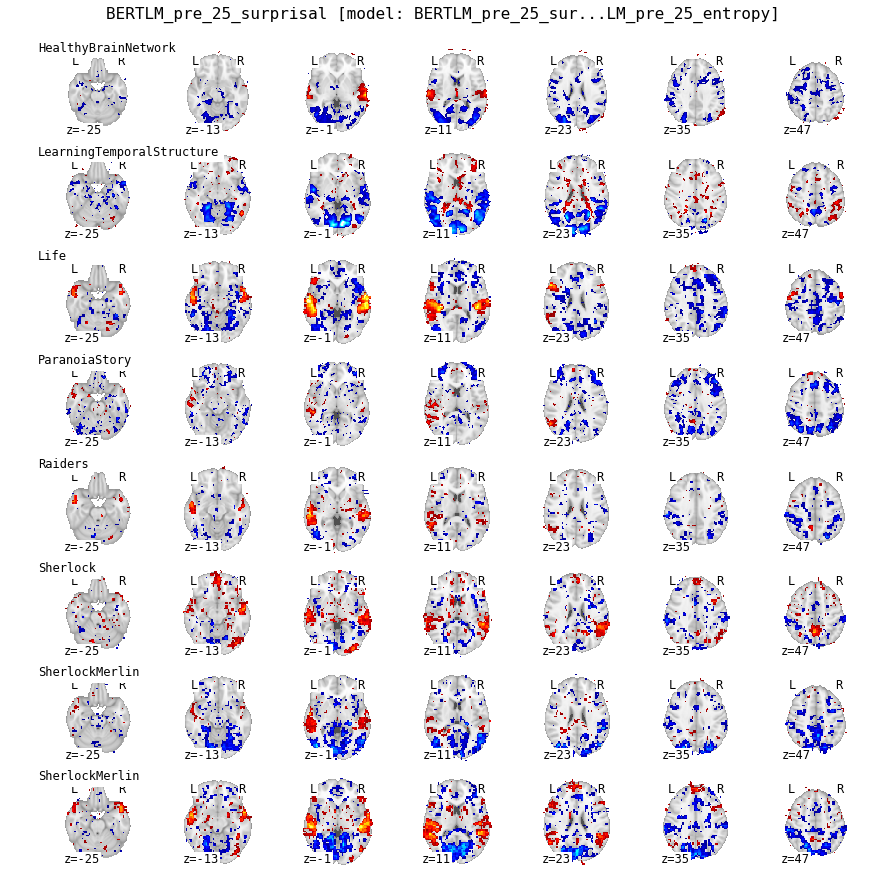

In [15]:
plot_contrast_by_analysis(analyses=flat_models_control,
                          vmax=10, display_mode='z', 
                          figsize=(15,15),
                          threshold=1.96, colorbar=False)